# 计算cpk并绘图

## 导入使用到的modules

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

title = None
legendlist = []


## 定义计算cpk和绘图的函数

In [10]:
def cpk_calc(df_data: pd.DataFrame, usl, lsl,serialTitle):
    """
    :param df_data: 数据dataframe
    :param usl: 数据指标上限
    :param lsl: 数据指标下限
    :return:
    """
    global title
    sigma = 3
    # 若下限为0, 则使用上限反转负值替代
    if int(lsl) == 0:
        lsl = 0 - usl
 
    # 数据平均值
    #print(type(df_data.mean()))
    #print(df_data.mean())


    u = df_data.mean()[serialTitle]

    #print('mean',u)

    # 数据标准差
    stdev = np.std(df_data.values, ddof=1)
    #print('stdev',stdev)

    # 生成横轴数据平均分布
    x1 = np.linspace(u - sigma * stdev, u + sigma * stdev, 1000)
    #print(type(x1))

    # 计算正态分布曲线
    y1 = np.exp(-(x1 - u) ** 2 / (2 * stdev ** 2)) / (math.sqrt(2 * math.pi) * stdev)
    #print(type(y1))

    cpu = (usl - u) / (sigma * stdev)
    cpl = (u - lsl) / (sigma * stdev)
    # 得出cpk
    cpk = min(cpu, cpl)

    # 使用matplotlib画图
    plt.xlim(x1[0] - 0.5, x1[-1] + 0.5)
    plt.plot(x1, y1)


    #plt.hist(df_data.values, 15, density=True)
    if title is None:
        title = "{0} :CPK={1},mean = {2},stdev = {3}\n".format(serialTitle,cpk,u,stdev)
    else:
        title = title + ("{0} :CPK={1},mean = {2},stdev = {3}\n".format(serialTitle,cpk,u,stdev))
    plt.title(title)
    legendlist.append(serialTitle)
    plt.legend(legendlist)


## 导入待处理的数据

In [11]:
xlsx_file = "cpkdata.xlsx"
"""
# read_excel方法读取文件
xlsx_feature = pd.read_excel(xlsx_file, usecols=[1, 2, 3, 4, 5, 6, 7]) 
#usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始

"""
# read_excel方法返回类型为DataFrame，不需要再次转换
feature = pd.read_excel(xlsx_file, usecols=[1, 2, 3, 4, 5,6])
#print(type(feature))
print(feature)

    ambient     18     28  aftercyce  storage20  storage60
0     950.2  949.8  947.0      948.7      946.9      947.7
1     949.2  949.2  949.1      951.6      951.1      950.3
2     948.3  950.3  948.4      948.8      951.4      948.8
3     947.5  949.6  947.7      949.7      950.1      949.5
4     948.7  949.9  947.9      949.3      948.1      949.0
5     948.4  948.1  949.6      950.1      949.0      950.6
6     948.7  948.9  947.2      950.2      949.0      950.6
7     948.5  948.5  946.6      950.1      949.7      948.4
8     948.3  951.0  947.5      951.9      948.5      948.2
9     948.2  948.5  947.2      951.3      945.8      949.3
10    949.4  949.6  949.0      950.3      951.0      949.0
11    948.4  948.9  945.9      950.4      951.8      950.2
12    947.6  950.7  947.9      947.0      948.9      948.7
13    948.4  950.5  949.4      949.0      950.4      948.1
14    950.0  948.4  948.8      949.4      951.2      948.9
15    949.5  950.0  948.7      951.6      948.7      947

## 处理数据并 生成cpk曲线

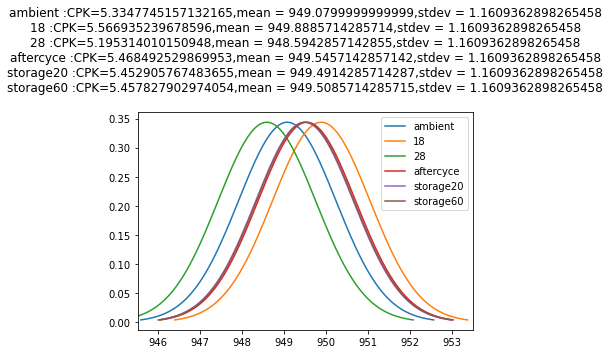

In [12]:
usl = 969.5
lsl = 930.5
cpk_calc(feature,usl,lsl,'ambient')
cpk_calc(feature,usl,lsl,18)
cpk_calc(feature,usl,lsl,28)
cpk_calc(feature,usl,lsl,'aftercyce')
cpk_calc(feature,usl,lsl,'storage20')
cpk_calc(feature,usl,lsl,'storage60')

